<a href="https://colab.research.google.com/github/swetzel1/introduction_to_ml/blob/main/hw5/hw5_p1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [74]:
%matplotlib inline
import numpy as np
import torch
torch.set_printoptions(edgeitems=2, linewidth=75)
import torch.optim as optim
import matplotlib.pyplot as plt

In [75]:
t_c = torch.tensor([0.5, 14.0, 15.0, 28.0, 11.0,
                    8.0, 3.0, -4.0, 6.0, 13.0, 21.0])
t_u = torch.tensor([35.7, 55.9, 58.2, 81.9, 56.3, 48.9,
                    33.9, 21.8, 48.4, 60.4, 68.4])
t_un = 0.1 * t_u

### Quadratic model - SGD optimizer - normalized input data

In [76]:
def model(t_u, w1, w2, b):
    return w2 * t_u ** 2 + w1 * t_u + b #quadratic model

In [77]:
def lin_model(t_u, w, b):
    return w * t_u + b

In [78]:
def loss_fn(t_p, t_c):
    squared_diffs = (t_p - t_c)**2
    return squared_diffs.mean()

In [79]:
def training_loop(n_epochs, optimizer, params, t_u, t_c):
    loss_history = np.zeros([2,250])
    i = 0

    for epoch in range(1, n_epochs + 1):
        t_p = model(t_u, *params)
        loss = loss_fn(t_p, t_c)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if epoch % 500 == 0: #report loss every 500 epochs
            print('Epoch %d, Loss %f' % (epoch, float(loss)))

        if epoch % 20 == 0: # store loss every 20 epochs
          loss_history[0][i] = epoch
          loss_history[1][i] = float(loss)
          i = i+1

    return params, loss_history

In [80]:
params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # extend params to fit model

learning_rate = 0.0002 #0.00085 [1e-4, 6e-4, 8e-4, 8.5e-4]

optimizer = optim.SGD([params], lr=learning_rate) # SGD - vanilla gradient descent

final_params, loss_history = training_loop(
    n_epochs = 5000,
    optimizer = optimizer,
    params = params,
    t_u = t_un, #use normalized input data
    t_c = t_c)

Epoch 500, Loss 8.644965
Epoch 1000, Loss 6.124641
Epoch 1500, Loss 4.845726
Epoch 2000, Loss 4.194871
Epoch 2500, Loss 3.861782
Epoch 3000, Loss 3.689472
Epoch 3500, Loss 3.598522
Epoch 4000, Loss 3.548753
Epoch 4500, Loss 3.519840
Epoch 5000, Loss 3.501493


In [81]:
print('Final model parameters:', final_params)

Final model parameters: tensor([-1.1697,  0.6078, -1.1362], requires_grad=True)


Text(0.5, 1.0, '0.0002')

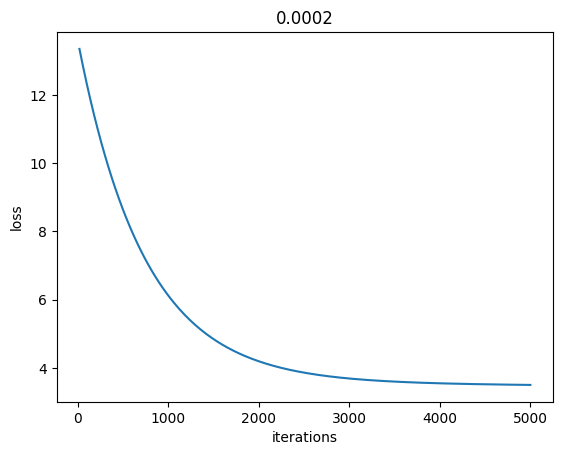

In [82]:
plt.plot(loss_history[0], loss_history[1])
plt.ylabel('loss')
plt.xlabel('iterations')
plt.title(learning_rate)

In [83]:
for lr in [1e-4, 6e-4, 8e-4, 8.5e-4]: # lr>=9e-4 results in non-converging loss

  print('SGD, learning rate:',lr)
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # extend params to fit model
  learning_rate = lr
  optimizer = optim.SGD([params], lr=learning_rate) # SGD - vanilla gradient descent

  final_params, loss_history = training_loop(
      n_epochs = 5000,
      optimizer = optimizer,
      params = params,
      t_u = t_un,
      t_c = t_c)

  print('\n')

SGD, learning rate: 0.0001
Epoch 500, Loss 10.708596
Epoch 1000, Loss 8.642083
Epoch 1500, Loss 7.171005
Epoch 2000, Loss 6.123478
Epoch 2500, Loss 5.377227
Epoch 3000, Loss 4.845286
Epoch 3500, Loss 4.465788
Epoch 4000, Loss 4.194724
Epoch 4500, Loss 4.000802
Epoch 5000, Loss 3.861744


SGD, learning rate: 0.0006
Epoch 500, Loss 4.847495
Epoch 1000, Loss 3.689496
Epoch 1500, Loss 3.519837
Epoch 2000, Loss 3.478297
Epoch 2500, Loss 3.453638
Epoch 3000, Loss 3.431468
Epoch 3500, Loss 3.409927
Epoch 4000, Loss 3.388765
Epoch 4500, Loss 3.367948
Epoch 5000, Loss 3.347466


SGD, learning rate: 0.0008
Epoch 500, Loss 4.195781
Epoch 1000, Loss 3.548735
Epoch 1500, Loss 3.478307
Epoch 2000, Loss 3.446147
Epoch 2500, Loss 3.417074
Epoch 3000, Loss 3.388778
Epoch 3500, Loss 3.361097
Epoch 4000, Loss 3.334007
Epoch 4500, Loss 3.307492
Epoch 5000, Loss 3.281543


SGD, learning rate: 0.00085
Epoch 500, Loss 5.357551
Epoch 1000, Loss 3.534876
Epoch 1500, Loss 3.471604
Epoch 2000, Loss 3.438776
Epoc

### Quadratic model - Adam optimizer - not normalized input data

Adam, learning rate: 0.001
Epoch 500, Loss 3668163.000000
Epoch 1000, Loss 768786.437500
Epoch 1500, Loss 90021.125000
Epoch 2000, Loss 4791.339844
Epoch 2500, Loss 98.014191
Epoch 3000, Loss 6.609710
Epoch 3500, Loss 6.117270
Epoch 4000, Loss 6.096753
Epoch 4500, Loss 6.071090
Epoch 5000, Loss 6.038404


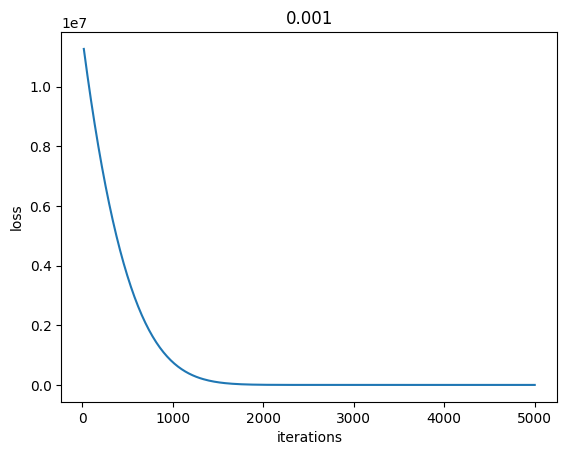



Adam, learning rate: 0.01
Epoch 500, Loss 6.108693
Epoch 1000, Loss 5.984358
Epoch 1500, Loss 5.809032
Epoch 2000, Loss 5.586317
Epoch 2500, Loss 5.320902
Epoch 3000, Loss 5.021267
Epoch 3500, Loss 4.701309
Epoch 4000, Loss 4.380754
Epoch 4500, Loss 4.083409
Epoch 5000, Loss 3.832656


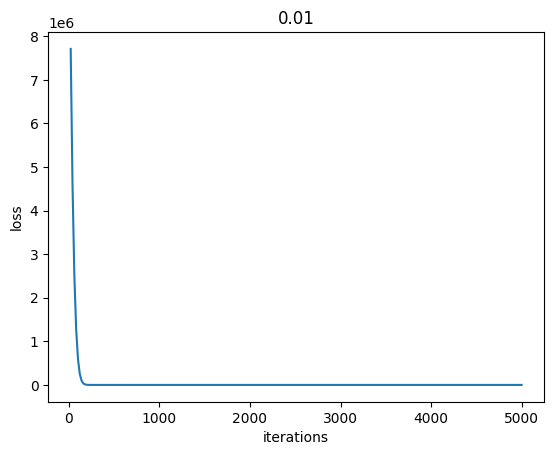



Adam, learning rate: 0.1
Epoch 500, Loss 4.844501
Epoch 1000, Loss 3.785644
Epoch 1500, Loss 3.466676
Epoch 2000, Loss 3.406405
Epoch 2500, Loss 3.377975
Epoch 3000, Loss 3.344335
Epoch 3500, Loss 3.301921
Epoch 4000, Loss 3.249141
Epoch 4500, Loss 3.184418
Epoch 5000, Loss 3.106353


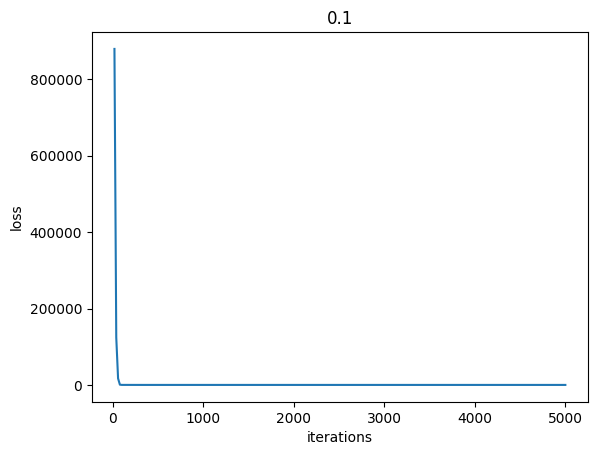



Adam, learning rate: 0.5
Epoch 500, Loss 3.470972
Epoch 1000, Loss 3.369133
Epoch 1500, Loss 3.289435
Epoch 2000, Loss 3.187369
Epoch 2500, Loss 3.064371
Epoch 3000, Loss 2.923462
Epoch 3500, Loss 2.792620
Epoch 4000, Loss 3.522834
Epoch 4500, Loss 29.497511
Epoch 5000, Loss 2.513976


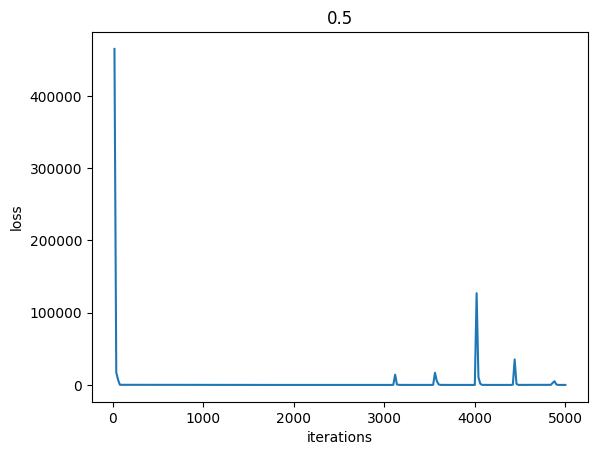

In [84]:
for lr in [0.001, 0.01, 0.1, 0.5]: #lr for adam

  print('Adam, learning rate:',lr)
  params = torch.tensor([1.0, 1.0, 0.0], requires_grad=True) # extend params to fit model
  learning_rate = lr
  optimizer = optim.Adam([params], lr=learning_rate) # Adam

  final_params, loss_history = training_loop(
      n_epochs = 5000,
      optimizer = optimizer,
      params = params,
      t_u = t_u, #use original data
      t_c = t_c)

  fig = plt.figure()
  plt.plot(loss_history[0], loss_history[1])
  plt.ylabel('loss')
  plt.xlabel('iterations')
  plt.title(lr)
  plt.show()

  print('\n')

In [85]:
print('Final model parameters:', final_params)

Final model parameters: tensor([ 4.3812e-02,  4.6928e-03, -5.4357e+00], requires_grad=True)


Text(0.5, 1.0, 'Quadratic Model')

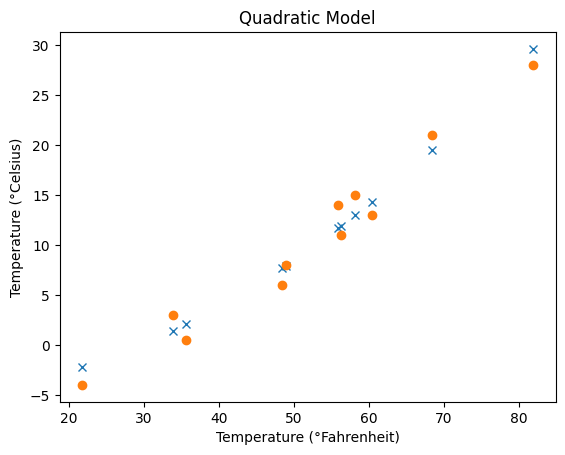

In [86]:
t_p = model(t_u, *params) #predict values with best found model

fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'x') #predicted
plt.plot(t_u.numpy(), t_c.numpy(), 'o') #ground truth
plt.title('Quadratic Model')


Text(0.5, 1.0, 'Quadratic Model')

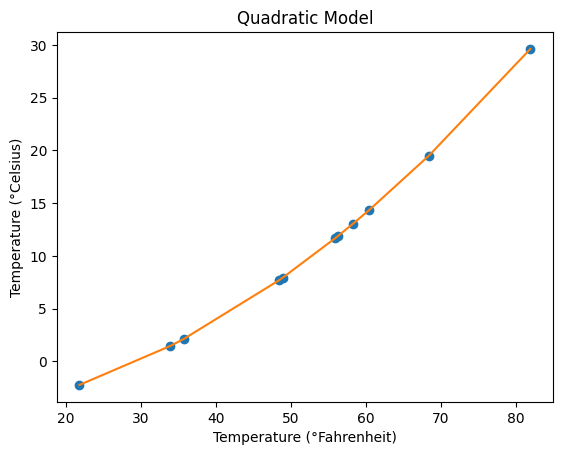

In [73]:
###
t_p = model(t_u, *params) #predict values with best found model

t_pred_np = t_p.detach().numpy()
t_pred_np.sort()

t_org_np = t_u.numpy()
t_org_np.sort()

fig = plt.figure()
plt.xlabel("Temperature (°Fahrenheit)")
plt.ylabel("Temperature (°Celsius)")
plt.plot(t_u.numpy(), t_p.detach().numpy(), 'o') # predicted data
plt.plot(t_org_np, t_pred_np)
plt.title('Quadratic Model')